# Experiment 4 Contrast list
The goal of this experiment is to make a list of covariates of interest and their respective availability

In [1]:
import os
import numpy as np
import pandas as pd
from cycler import cycler
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# Set the paths
full_pheno = '/data1/abide/Pheno/full_merged_pheno.csv'

In [4]:
pheno = pd.read_csv(full_pheno)

In [5]:
# Let's look at the available variables
columns = list(pheno.columns)
# Count how many non NaN values I have for each of the categories
counts = [pheno[x].count() for x in columns]
patcounts = [pheno[pheno['DX_GROUP']==1][x].count() for x in columns]
concounts = [pheno[pheno['DX_GROUP']==2][x].count() for x in columns]
malecounts = [pheno[pheno['SEX']==1][x].count() for x in columns]
femalecounts = [pheno[pheno['SEX']==2][x].count() for x in columns]
# Get the IDs of the elements without NaN values
ids = [~pd.isnull(pheno[x].values) for x in columns]

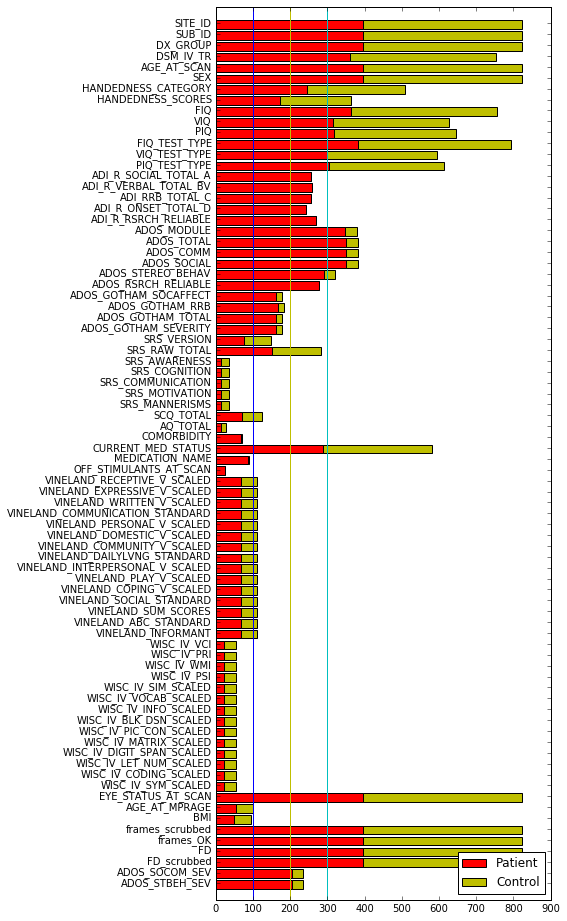

In [6]:
# Go through the covariates and list their numbers (possibly by site)
x = np.arange(len(counts)) + 1

fig = plt.figure(figsize=(6,16))
ax = fig.add_subplot(111)
tmp = ax.plot([300, 300], [0, len(counts)+2], 'c')
tmp = ax.plot([200, 200], [0, len(counts)+2], 'y')
tmp = ax.plot([100, 100], [0, len(counts)+2], 'b')
#tmp = ax.barh(x, counts[::-1])
p1 = ax.barh(x, patcounts[::-1], color='r')
p2 = ax.barh(x, concounts[::-1], color='y',
             left=patcounts[::-1])
tmp = ax.set_yticks(x+0.5)
tmp = ax.set_yticklabels(columns[::-1])
tmp = ax.set_ylim([0, len(counts)+2])
tmp = ax.legend((p1[0], p2[0]), ('Patient', 'Control'), loc='lower right')

Things that make sense to look at:

- Diagnosis
- Age
- ADI_R (gotta look up how that is exactly coded)
- Handedness (either categorical or dimensional)
- IQ (any of them)
- ADOS (Gotham total or our Gotham estimate - what's the difference again?)
- SRS Total (what is this?)
- Eye Status
- Motion (kinda noise, but I think this may work as well)

The problem is that some of them are clearly not balanced wrt diagnosis. Site will likely be even worse (and not clear how to look at since there are so many sites).

Of the clinical metrics, SRS might be one of the more useful then. Let's just count the number of sites for them

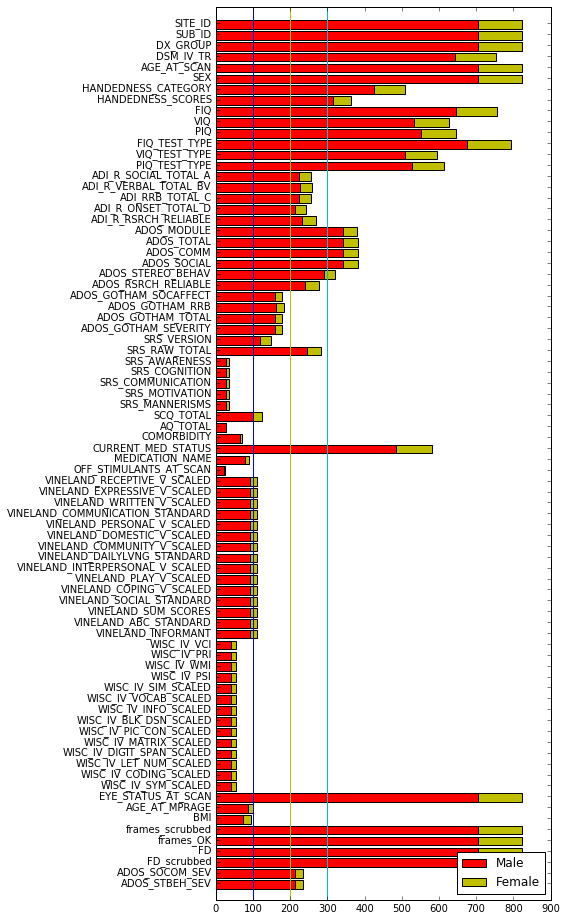

In [7]:
# Go through the covariates and list their numbers (possibly by site)
x = np.arange(len(counts)) + 1

fig = plt.figure(figsize=(6,16))
ax = fig.add_subplot(111)
tmp = ax.plot([300, 300], [0, len(counts)+2], 'c')
tmp = ax.plot([200, 200], [0, len(counts)+2], 'y')
tmp = ax.plot([100, 100], [0, len(counts)+2], 'b')
#tmp = ax.barh(x, counts[::-1])
p1 = ax.barh(x, malecounts[::-1], color='r')
p2 = ax.barh(x, femalecounts[::-1], color='y',
             left=malecounts[::-1])
tmp = ax.set_yticks(x+0.5)
tmp = ax.set_yticklabels(columns[::-1])
tmp = ax.set_ylim([0, len(counts)+2])
tmp = ax.legend((p1[0], p2[0]), ('Male', 'Female'), loc='lower right')

In [8]:
# Count the number of sites that are involved with each contrast
numsites = [len(pheno[x]['SITE_ID'].unique()) for x in ids]

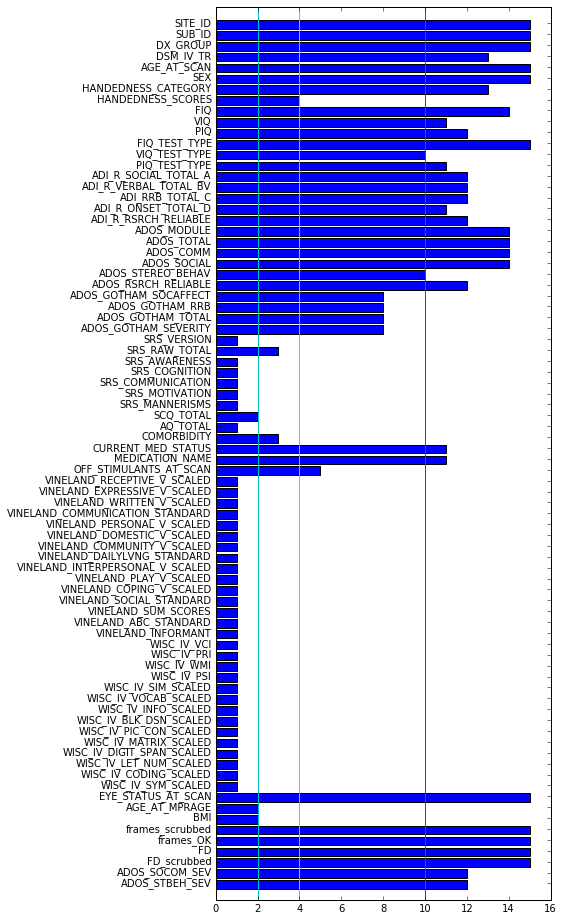

In [9]:
# Go through the covariates and list their numbers (possibly by site)
x = np.arange(len(counts)) + 1

fig = plt.figure(figsize=(6,16))
ax = fig.add_subplot(111)

tmp = ax.plot([2, 2], [0, len(counts)+2], 'c')
tmp = ax.plot([4, 4], [0, len(counts)+2], 'y')
tmp = ax.plot([10, 10], [0, len(counts)+2], 'r')

p1 = ax.barh(x, numsites[::-1], color='b')
tmp = ax.set_yticks(x+0.5)
tmp = ax.set_yticklabels(columns[::-1])
tmp = ax.set_ylim([0, len(counts)+2])
#tmp = ax.legend((p1[0], p2[0]), ('Patient', 'Control'), loc='lower right')

In [10]:
# Make a list of clinical contrasts
clin_cat = ['DX_GROUP','DSM_IV_TR']
clin_dim = ['ADOS_SOCOM_SEV','SRS_RAW_TOTAL']
# Make a list of non-clinical contrasts
norm_cat = ['SEX','HANDEDNESS_CATEGORY','EYE_STATUS_AT_SCAN']
norm_dim = ['AGE_AT_SCAN','HANDEDNESS_SCORES','FIQ','VIQ','PIQ','FD_scrubbed','frames_scrubbed']

In [11]:
def show_cat(pheno, clin_cat):
    # Make Sites Work
    site_names = list(pheno['SITE_ID'].unique())
    n_sites = len(site_names)
    for cc in clin_cat:
        # Get the age distribution
        names = [name for name, group in pheno.groupby(cc)]
        n_grp = len(pheno.groupby(cc))

        fig = plt.figure(figsize=(20,6))
        ax1 = fig.add_subplot(141)
        ax2 = fig.add_subplot(142)
        ax3 = fig.add_subplot(143)
        ax4 = fig.add_subplot(144)

        # Get ages
        ages = [group['AGE_AT_SCAN'].values for name, group in pheno.groupby(cc)]

        # Get Motion
        motion = [group['FD_scrubbed'].values for name, group in pheno.groupby(cc)]

        # Get Sex
        malecounts = [pheno[pheno['SEX']==1][x].count() for x in columns]
        femalecounts = [pheno[pheno['SEX']==1][x].count() for x in columns]

        # Get Sex and Sites
        d_sex = np.zeros((n_grp, 2))
        d_site = np.zeros((n_grp, n_sites))
        for gid, (name, group) in enumerate(pheno.groupby(cc)):
            # Check Sex
            malen = group[group['SEX']==1]['SEX'].count()
            femalen = group[group['SEX']==2]['SEX'].count()
            d_sex[gid, 0] = malen
            d_sex[gid, 1] = femalen

            # Get number of subjects in sites
            nsub = group.groupby('SITE_ID').size()
            # Check sites
            for sid, site in enumerate(site_names):
                if site in nsub.keys():
                    d_site[gid, sid] = nsub[site]
                else:
                    d_site[gid, sid] = 0


        # Patch this together into a dataframe
        sitedf = pd.DataFrame(d_site, columns=site_names)
        sexdf = pd.DataFrame(d_sex, columns=('Male', 'Female'))

        # Plot Age
        ax1.boxplot(ages)
        ax1.set_xticks(np.arange(len(names))+1)
        ax1.set_xticklabels(names)
        ax1.set_ylabel('Age')
        ax1.set_xlabel(cc)
        ax1.set_title('Age')

        # Plot Motion
        ax2.boxplot(motion)
        ax2.set_xticks(np.arange(len(names))+1)
        ax2.set_xticklabels(names)
        ax2.set_ylabel('Motion')
        ax2.set_xlabel(cc)
        ax2.set_title('Motion')

        # Plot Sex
        sexdf.plot.bar(stacked=True, ax=ax3)
        ax3.set_xlabel(cc)
        ax3.set_title('Sex')

        # Plot Sites
        sitedf.plot.bar(stacked=True, ax=ax4)
        ax4.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        ax4.set_xlabel(cc)
        ax4.set_title('Site')

        fig.suptitle(cc)

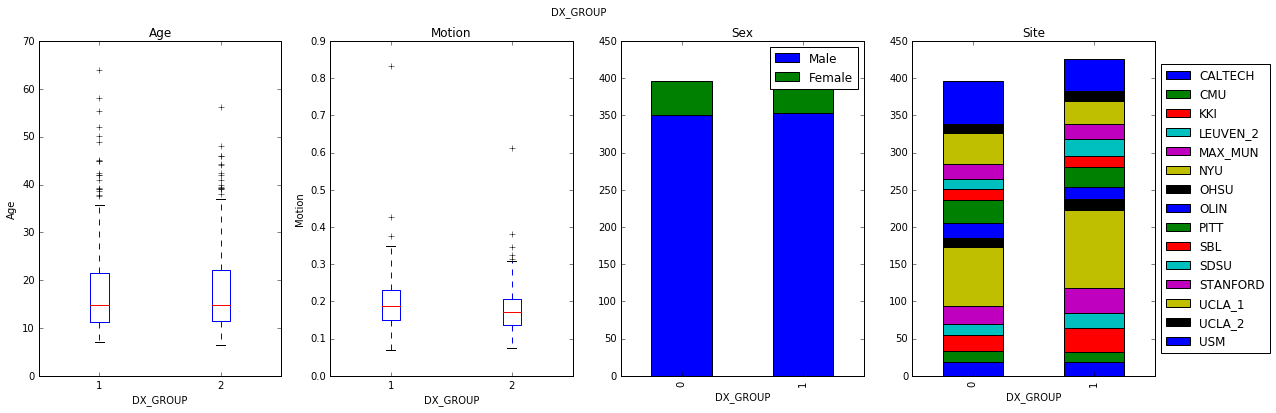

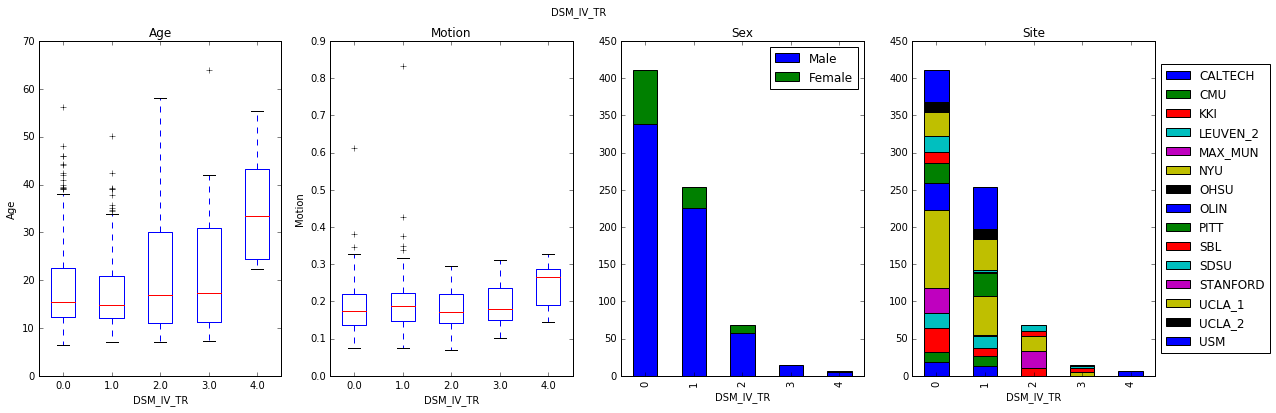

In [12]:
show_cat(pheno, clin_cat)

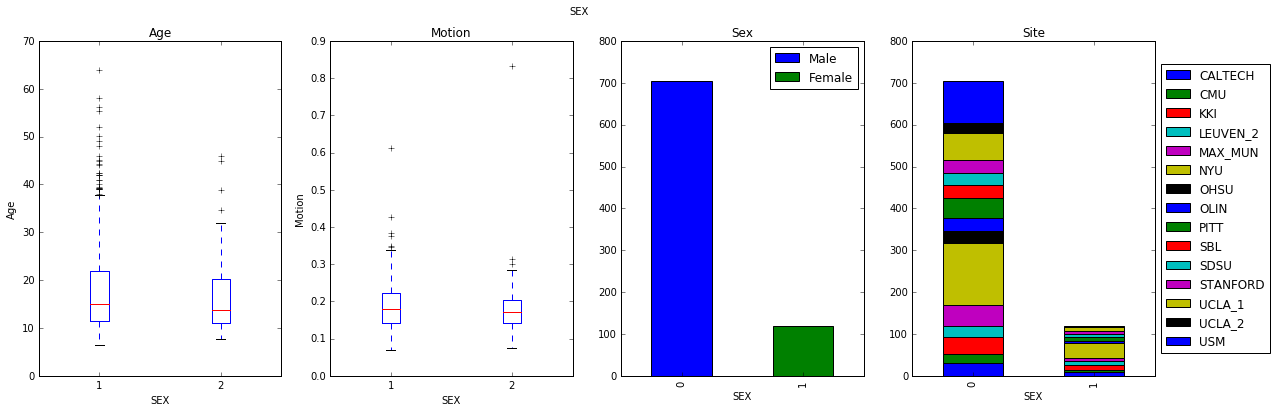

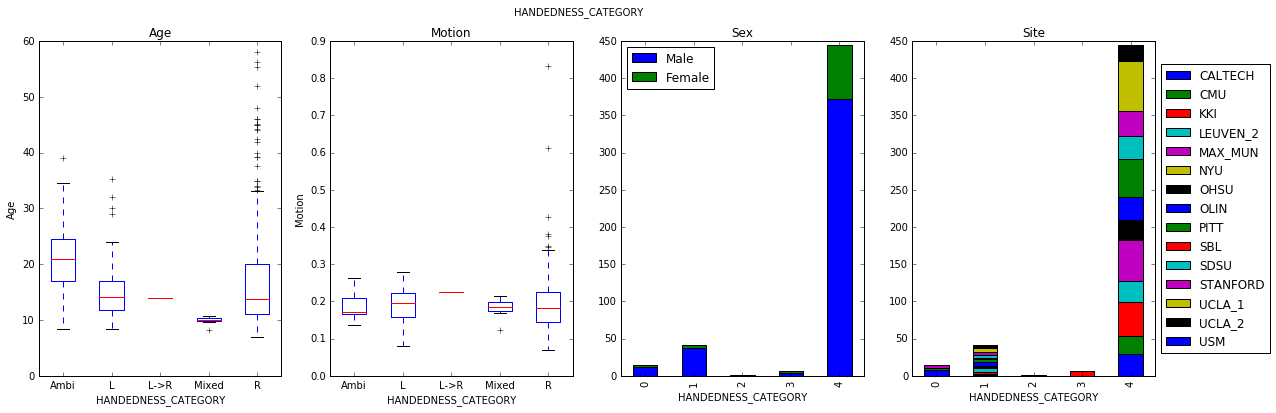

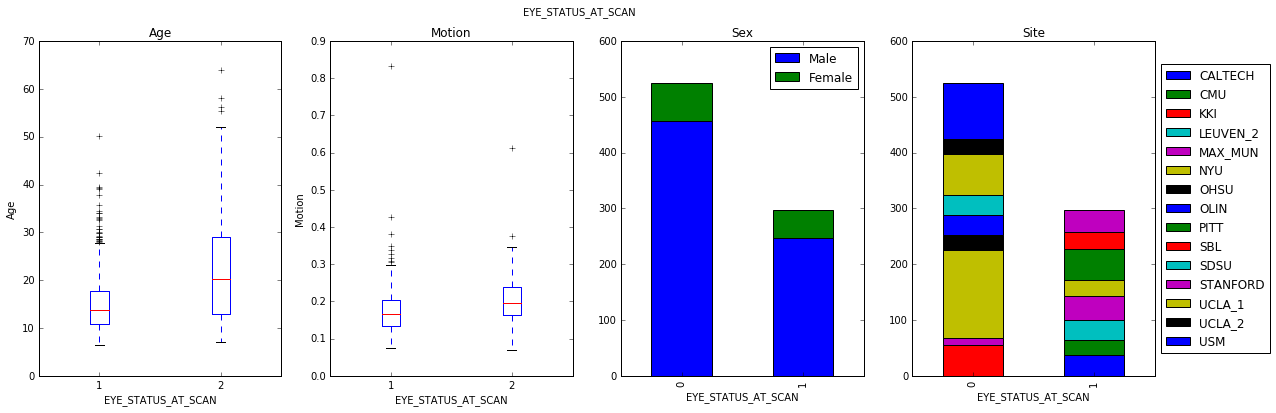

In [13]:
show_cat(pheno, norm_cat)

In [14]:
def show_dim(pheno, clin_dim):
    for cc in clin_dim:
        # Get the subjects that have non-null data
        idx = ~pd.isnull(pheno[cc].values)
        cphen = pheno[idx]
        vals = cphen[cc].values
        vmin = np.min(vals)
        vmax = np.max(vals)
        valoff = 0.1 * (vmax - vmin)
        valrange = (vmin-valoff, vmax+valoff)
        n_vals = len(vals)

        fig = plt.figure(figsize=(25,6))
        ax1 = fig.add_subplot(151)
        ax2 = fig.add_subplot(152)
        ax3 = fig.add_subplot(153)
        ax4 = fig.add_subplot(154)
        ax5 = fig.add_subplot(155)

        # Get ages
        ages = cphen['AGE_AT_SCAN'].values

        # Get Motion
        motion = cphen['FD_scrubbed'].values

        # Get Sex
        sextmp = [name for name, group in cphen.groupby('SEX')]
        sexdict = {1:'Male', 2:'Female'}
        sexlab = [sexdict[x] for x in sextmp]
        sexvals = [group[cc].values for name, group in cphen.groupby('SEX')]

        # Get Sites
        sitelab = [name for name, group in cphen.groupby('SITE_ID')]
        sitevals = [group[cc].values for name, group in cphen.groupby('SITE_ID')]
        
        # Get Diagnosis
        diagtmp = [name for name, group in cphen.groupby('DX_GROUP')]
        diagdict = {1:'Patient', 2:'Control'}
        diaglab = [diagdict[x] for x in diagtmp]
        diagvals = [group[cc].values for name, group in cphen.groupby('DX_GROUP')]
        

        # Plot Age
        ax1.plot(vals, ages, '.r')
        ax1.set_xlim(valrange)
        ax1.set_ylabel('Age')
        ax1.set_xlabel(cc)

        # Plot Motion
        ax2.plot(vals, motion, '.r')
        ax2.set_xlim(valrange)
        ax2.set_ylabel('Motion')
        ax2.set_xlabel(cc)

        # Plot Sex
        ax3.boxplot(sexvals)
        ax3.set_xticklabels(sexlab)
        ax3.set_ylim(valrange)
        ax3.set_xlabel('Sex')
        ax3.set_ylabel(cc)

        # Plot Site
        ax4.boxplot(sitevals)
        ax4.set_xticklabels(sitelab, rotation=80)
        ax4.set_ylim(valrange)
        ax4.set_xlabel('Site')
        ax4.set_ylabel(cc)
        
        # Plot Diagnosis
        ax5.boxplot(diagvals)
        ax5.set_xticklabels(diaglab)
        ax5.set_ylim(valrange)
        ax5.set_xlabel('Diagnosis')
        ax5.set_ylabel(cc)

        fig.suptitle('{} (N={})'.format(cc, n_vals))

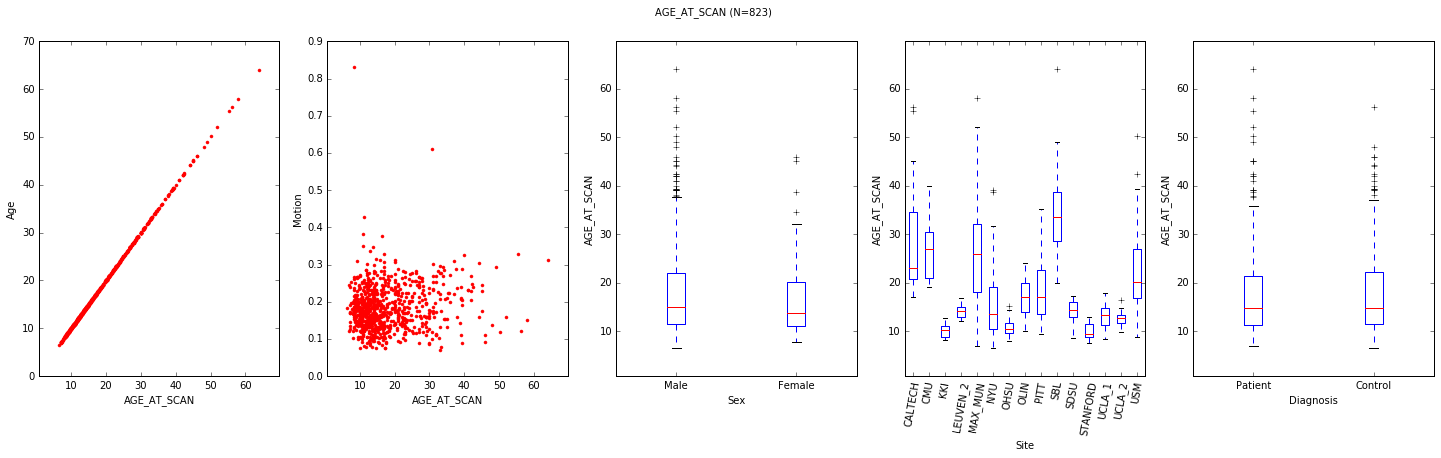

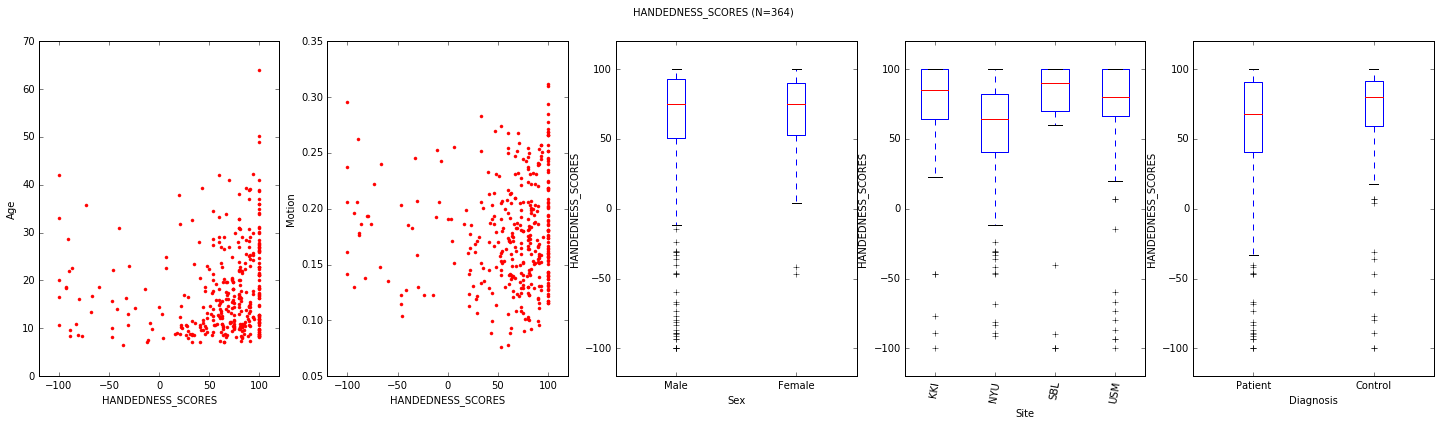

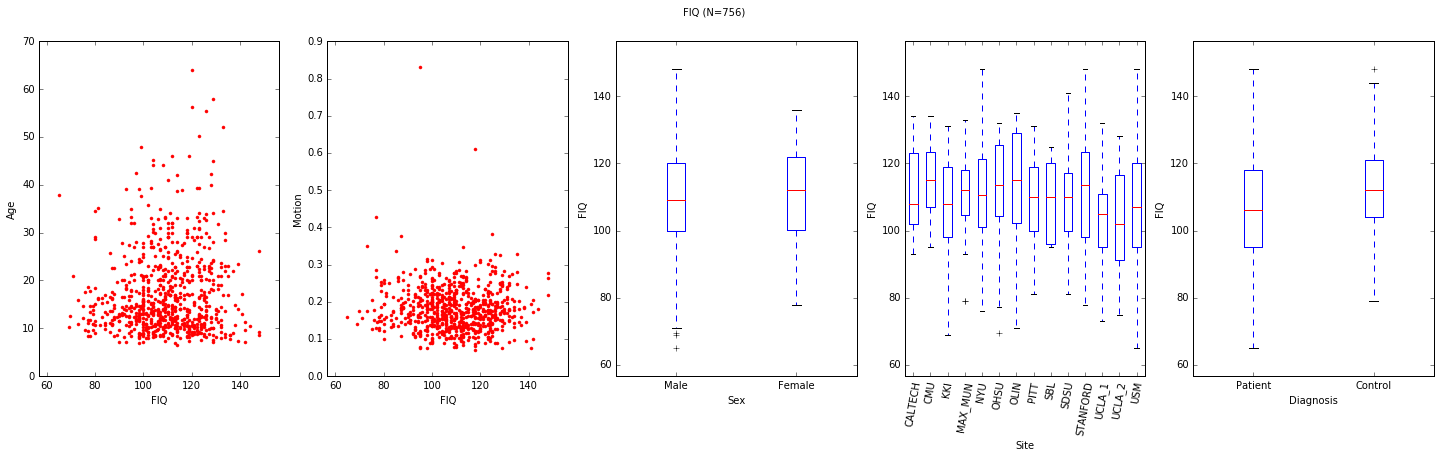

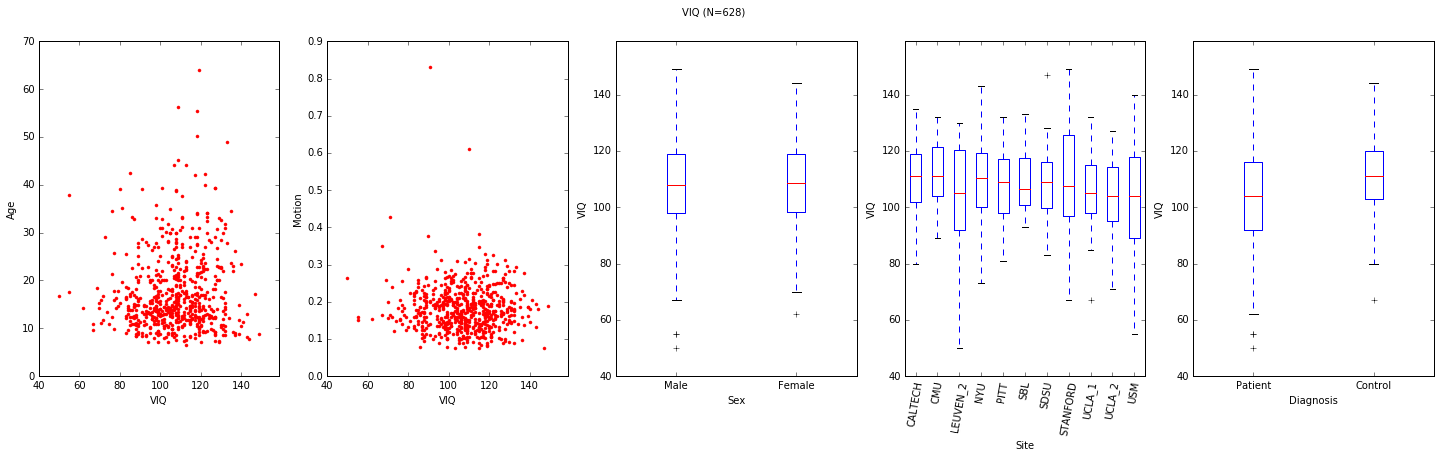

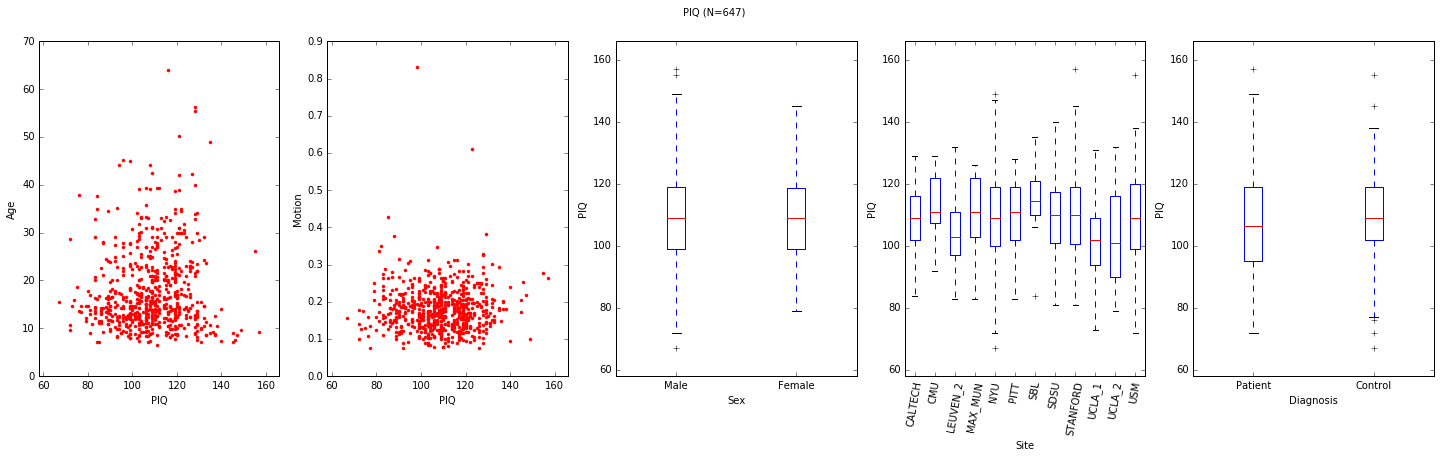

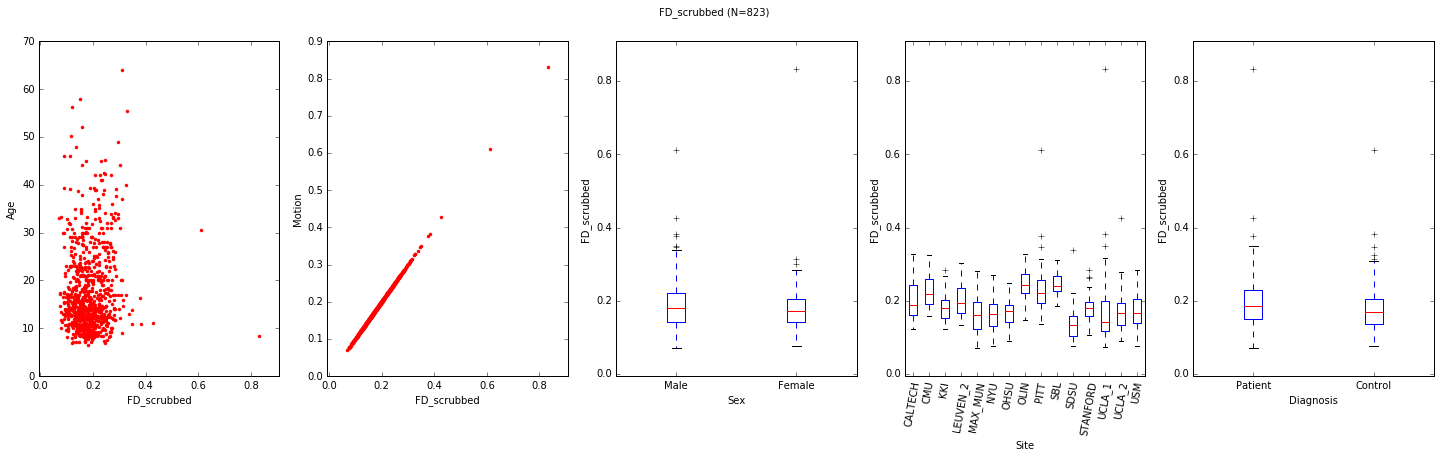

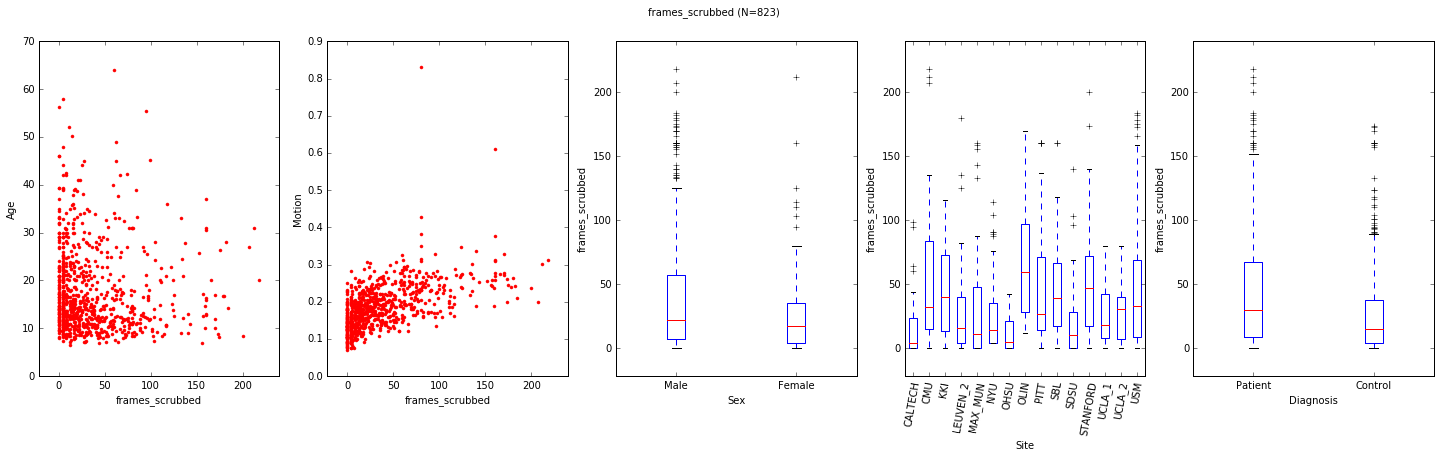

In [15]:
show_dim(pheno, norm_dim)

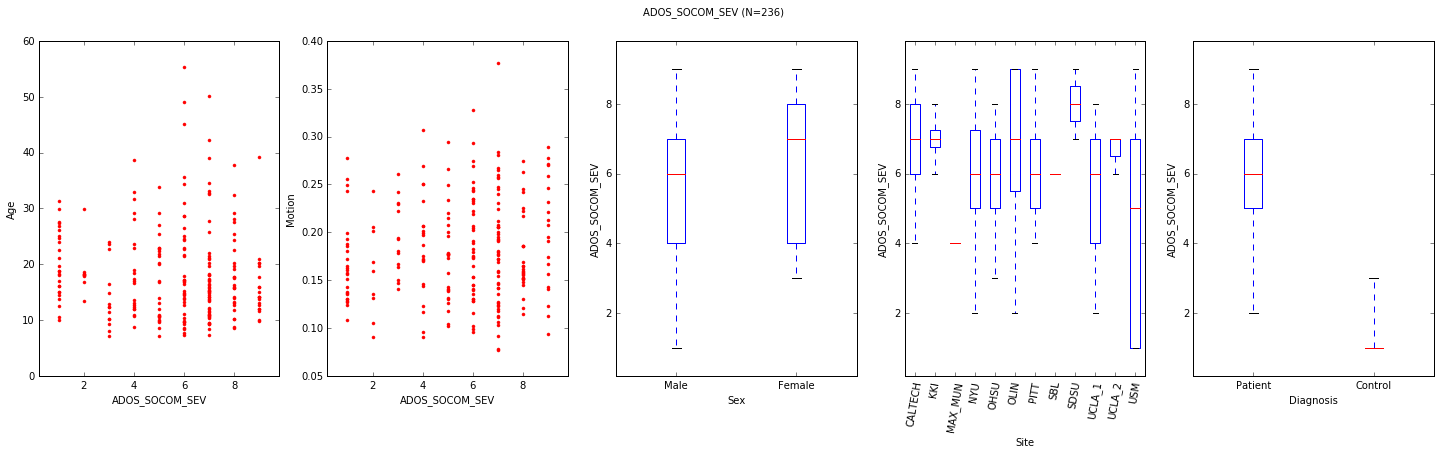

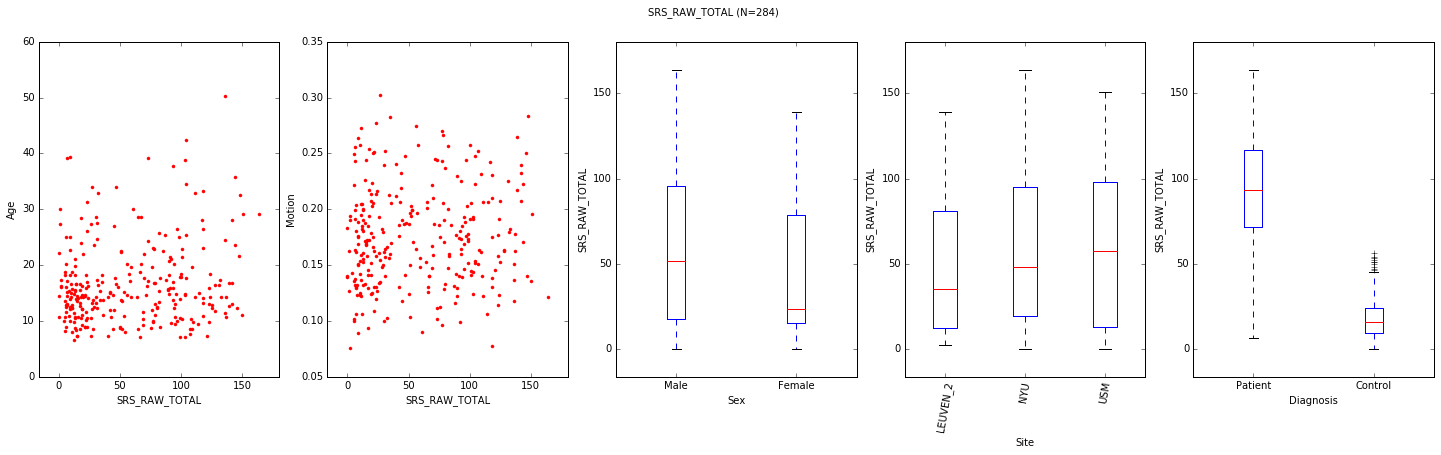

In [16]:
show_dim(pheno, clin_dim)